# Kmeans Clustering
Unsupervised learning algorithm that **searches for a pre-determined number of clusters** within an **unlabeled** multidimensional dataset. Under this concept, this is what optimal clustering looks like:
- The *"cluster center"* is the arithmetic mean of all the points belonging to a cluster.
- Each point is closer to its own cluster center than to other cluster centers.

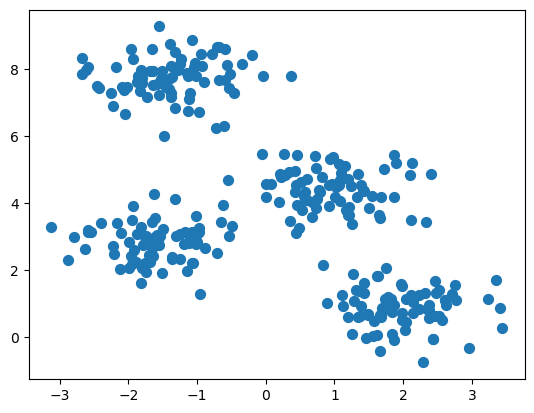

In [4]:
''' Necessary imports '''
import pandas as pd
from sklearn.model_selection import train_test_split

''' Making sample dataset '''
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

## K-Means Clustering Parameters
Unlike others, k-means clustering only has a few important parameters that may need tuned.
- **n_clusters**: Controls how many clusters *k* in which the data should be partitioned. (default=8)
- **init**: Specifies method for initializing cluster centroids (default=*'k-means++'*, which is sufficient. No need to change to 'random')
- **max_iter**: The maximum number of iterations the algorithm will run through for a single iteration. Prevents infinite looping if the algorithm fails. (default=300)
- **n_init**: The number of times the algorithm will run with different centroid seeds. (default=10)

In [5]:
params = {
    'n_clusters': [4],  # Known Value
    'init': ['k-means++'],
    'max_iter': [300],  # Default is usually fine
    'n_init': [10, 20]  # Default is also usually fine
}

### Creating Kmeans Clustering
To be performed on produced dataset

c:\Users\jairi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


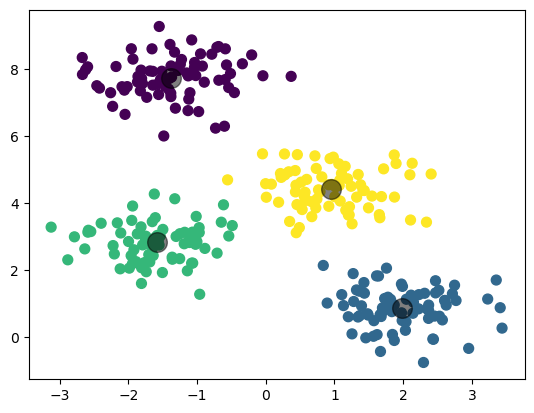

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(X)
y_clusters = kmeans.predict(X)  # Predicting clusters

# Visualizing
plt.scatter(X[:, 0], X[:, 1], c=y_clusters, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

## Limitations with this implementation of KMeans Clustering
- The globally optimal result may not be acheived
- The number of clusters must be selected beforehand
- K-means can be slow for large numbers of samples
- **K-means is limited to linear cluster boundaries**

In order to fix the last problem, we can use ***Spectral Clustering***, which is essentially a kernelized k-means implementation that computes a higher-dimensional representation of the data.

#### Spectral Clustering Parameters
- **n_clusters**
- **affinity**: Specifies how similarity between points is measured when creating the affinity matrix.
    - **'nearest neighbors'**: Constructs the graph based on nearest neighbors. When using this parameter, must also specify *n_neighbors* as parameter.
    - **'rbf'**: Constructs the graph using Radial Basis Function, similar to SVM *(default value)*

In [ ]:
''' Spectral Clustering Example (better fit for non-linear relationships) '''
from sklearn.cluster import SpectralClustering

spectral_cluster = SpectralClustering(n_clusters=4)
labels = spectral_cluster.fit_predict(X)

# Show predictions via graph
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')